#### METİN SINIFLANDIRMA

In [1]:
import pandas as pd 
df = pd.read_csv('7allV03.csv')
#df.head() ilk 5 veriyi gösterir
df.sample(n=7)

,category,text
3353,saglik,ameliyat sayısı 10 yılda 4 kat arttı türkiye ...
1646,ekonomi,istanbul da elektrik kesintisi bahçelievler b...
4680,teknoloji,apple iphone için hangi isimleri düşünmüş ! i...
3195,saglik,kadınlarda 7 kat fazla görülüyor çalışmadığı ...
3720,spor,masa tenisinde 3 etap izmir de masa tenisinde...
2638,kultur,michael_jackson the immortal world tour ülker...
285,siyaset,lise arkadaşı abdullah_öcalan ı anlattı başba...


In [2]:
#Bütün veriden category ve text sütunlarını çekiyoruz. Eksik veriler varsa onları temizliyoruz. Kategoriler için birer id belirliyoruz.
from io import StringIO
col = ['category', 'text']
df = df[col]
df = df[pd.notnull(df['text'])]
df.columns = ['category', 'text']
df['category_id'] = df['category'].factorize()[0]
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df.sample(5)

,category,text,category_id
696,siyaset,aktörlerden biri de imralı pkk  ya silah bır...,0
1492,ekonomi,altının onsu 1 750 dolar sınırında seyrediyor...,2
3252,saglik,4 bin kişi bu yüzden ölüyor hayatı boyunca ev...,4
2342,kultur,görme engelli sanatçıdan trt ye aihm den dava...,3
2817,saglik,uyku apnesi kanseri tetikliyor uyku apnesi ol...,4


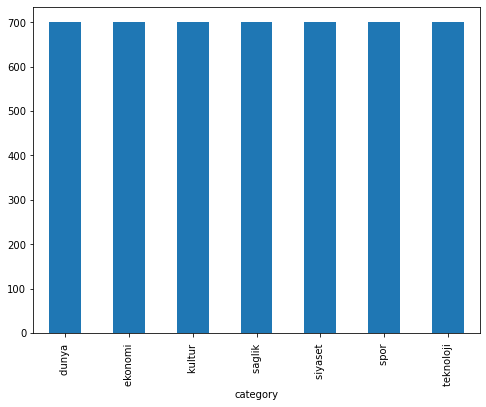

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

#Eş bir dağılım mevcut

In [4]:
#metinleri sayısal ifadeye dönüştürüyoruz. bunun için TF-IDF kullanılır
sw = pd.read_csv('stop_words_turkish.txt',sep="\n", header=None)
#df.head(n=20)
print(sw[0].values.tolist())

['acaba', 'altmış', 'altı', 'ama', 'ancak', 'arada', 'aslında', 'ayrıca', 'bana', 'bazı', 'belki', 'ben', 'benden', 'beni', 'benim', 'beri', 'beş', 'bile', 'bin', 'bir', 'birçok', 'biri', 'birkaç', 'birkez', 'birşey', 'birşeyi', 'biz', 'bize', 'bizden', 'bizi', 'bizim', 'böyle', 'böylece', 'bu', 'buna', 'bunda', 'bundan', 'bunlar', 'bunları', 'bunların', 'bunu', 'bunun', 'burada', 'çok', 'çünkü', 'da', 'daha', 'dahi', 'de', 'defa', 'değil', 'diğer', 'diye', 'doksan', 'dokuz', 'dolayı', 'dolayısıyla', 'dört', 'edecek', 'eden', 'ederek', 'edilecek', 'ediliyor', 'edilmesi', 'ediyor', 'eğer', 'elli', 'en', 'etmesi', 'etti', 'ettiği', 'ettiğini', 'gibi', 'göre', 'halen', 'hangi', 'hatta', 'hem', 'henüz', 'hep', 'hepsi', 'her', 'herhangi', 'herkesin', 'hiç', 'hiçbir', 'için', 'iki', 'ile', 'ilgili', 'ise', 'işte', 'itibaren', 'itibariyle', 'kadar', 'karşın', 'katrilyon', 'kendi', 'kendilerine', 'kendini', 'kendisi', 'kendisine', 'kendisini', 'kez', 'ki', 'kim', 'kimden', 'kime', 'kimi', 'kim

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 2), stop_words=sw[0].values.tolist())
features = tfidf.fit_transform(df.text).toarray()
labels = df.category_id
features.shape

(4900, 36029)

In [6]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category))
  print("  . En ilişkili unigram ifadeler:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . En ilişkili bigram ifadeler:\n. {}".format('\n. '.join(bigrams[-N:])))
  print("---------------------------")

# 'dunya ':
  . En ilişkili unigram ifadeler:
. suriye
. israil
  . En ilişkili bigram ifadeler:
. kişi öldü
. israil in
---------------------------
# 'ekonomi ':
  . En ilişkili unigram ifadeler:
. kredi
. yüzde
  . En ilişkili bigram ifadeler:
. yılın aynı
. endeksi yüzde
---------------------------
# 'kultur ':
  . En ilişkili unigram ifadeler:
. sanat
. film
  . En ilişkili bigram ifadeler:
. 11 2012
. film festivali
---------------------------
# 'saglik ':
  . En ilişkili unigram ifadeler:
. tedavi
. dr
  . En ilişkili bigram ifadeler:
. doç dr
. prof dr
---------------------------
# 'siyaset ':
  . En ilişkili unigram ifadeler:
. ak_parti
. chp
  . En ilişkili bigram ifadeler:
. chp li
. chp nin
---------------------------
# 'spor ':
  . En ilişkili unigram ifadeler:
. maç
. maçında
  . En ilişkili bigram ifadeler:
. galatasaray ın
. teknik direktör
---------------------------
# 'teknoloji ':
  . En ilişkili unigram ifadeler:
. google
. apple
  . En ilişkili bigram ifadeler:
. go

In [35]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)
print('Eğitim Tamamlandı.')

Eğitim Tamamlandı.


In [8]:
print(clf.predict(count_vect.transform(["kupa turnuva"])))

['spor ']


In [9]:
print(clf.predict(count_vect.transform(["google"])))

['teknoloji ']


In [10]:
print(clf.predict(count_vect.transform(["kredi"])))

['ekonomi ']


In [11]:
print(clf.predict(count_vect.transform(["film"])))

['kultur ']


In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()


In [37]:
X_test_counts = count_vect.transform(X_test)
X_test_counts

<1225x95929 sparse matrix of type '<class 'numpy.int64'>'
	with 199353 stored elements in Compressed Sparse Row format>

In [26]:
%time nb.fit(X_train_counts, y_train)

Wall time: 104 ms


MultinomialNB()

In [40]:
y_pred_class = nb.predict(X_test_counts)

In [41]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9012244897959184